<a href="https://colab.research.google.com/github/Opeyemiiii/opeyemi_python_and_Machine-learning_project_portfolio/blob/main/Employee_churn_prediction_Random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
hr_data = pd.read_csv('/content/hrdata.csv')
hr_data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,03/01/1954,28/08/1989,01/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,03/01/1954,28/08/1989,01/01/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,03/01/1954,28/08/1989,01/01/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,03/01/1954,28/08/1989,01/01/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,03/01/1954,28/08/1989,01/01/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
hr_data.shape

(49653, 18)

In [ ]:
hr_data.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

18 columns or attribute and 49653 records, 12 attribute is object or strings while the rest are integer

In [ ]:
print(hr_data['STATUS'].nunique())
print(hr_data['city_name'].nunique())
print(hr_data['department_name'].nunique())
print(hr_data['job_title'].nunique())
print(hr_data['termreason_desc'].nunique())
print(hr_data['termtype_desc'].nunique())
print(hr_data['BUSINESS_UNIT'].nunique())
print(hr_data['STATUS'].nunique())

2
40
21
47
4
3
2
2


DATA ANALYSIS

In [ ]:
correlation = hr_data.corr()

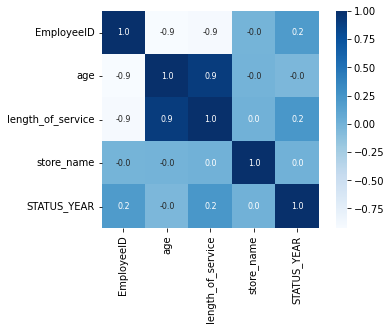

In [ ]:
sns.heatmap(correlation, square = True, cmap = 'Blues', cbar = True, fmt= '.1f', annot = True, annot_kws = {'size' : 8})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


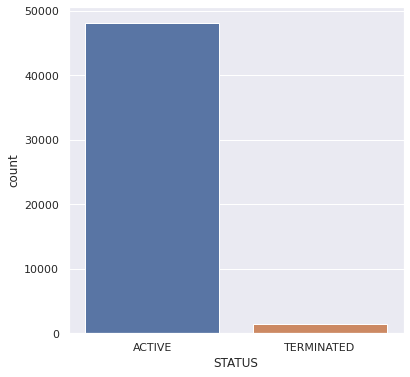

In [ ]:
sns.set()

plt.figure(figsize = (6,6))
sns.countplot(hr_data['STATUS'])

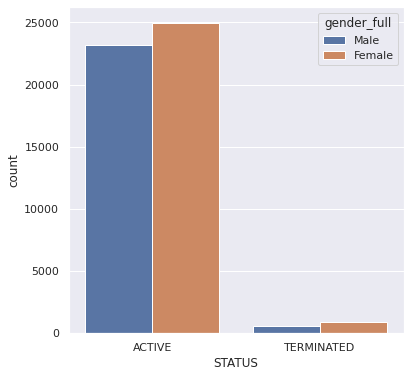

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'STATUS', hue = 'gender_full', data = hr_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


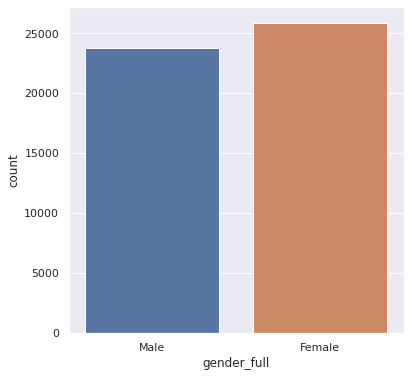

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(hr_data['gender_full'], data = hr_data)

<Figure size 432x432 with 0 Axes>

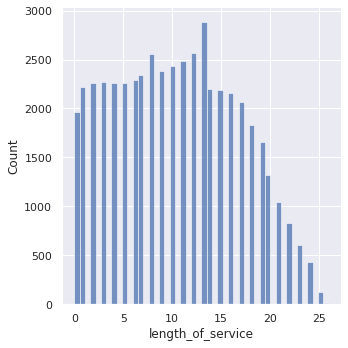

In [ ]:
plt.figure(figsize = (6,6))
sns.displot(hr_data['length_of_service'])

<Figure size 432x432 with 0 Axes>

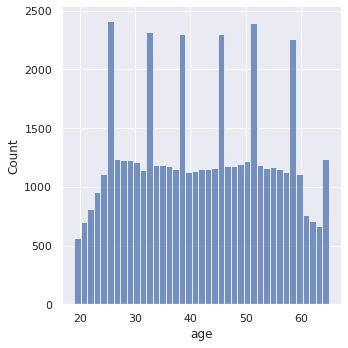

In [ ]:
plt.figure(figsize = (6,6))
sns.displot(hr_data['age'])

In [ ]:
Encoder = LabelEncoder()

In [ ]:
hr_data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,03/01/1954,28/08/1989,01/01/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,03/01/1954,28/08/1989,01/01/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,03/01/1954,28/08/1989,01/01/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,03/01/1954,28/08/1989,01/01/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,03/01/1954,28/08/1989,01/01/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [ ]:
hr_data['orighiredate_key'] = Encoder.fit_transform(hr_data['orighiredate_key'])
hr_data['city_name'] = Encoder.fit_transform(hr_data['city_name'])
hr_data['department_name'] = Encoder.fit_transform(hr_data['department_name'])
hr_data['job_title'] = Encoder.fit_transform(hr_data['job_title'])
hr_data['gender_full'] = Encoder.fit_transform(hr_data['gender_full'])
hr_data['BUSINESS_UNIT'] = Encoder.fit_transform(hr_data['BUSINESS_UNIT'])

In [ ]:
hr_data.replace({"STATUS" : {'ACTIVE' : 0, 'TERMINATED' : 1}}, inplace = True)

In [ ]:
hr_data

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,03/01/1954,3981,01/01/1900,52,17,34,9,7,35,M,1,Not Applicable,Not Applicable,2006,0,0
1,1318,12/31/2007 0:00,03/01/1954,3981,01/01/1900,53,18,34,9,7,35,M,1,Not Applicable,Not Applicable,2007,0,0
2,1318,12/31/2008 0:00,03/01/1954,3981,01/01/1900,54,19,34,9,7,35,M,1,Not Applicable,Not Applicable,2008,0,0
3,1318,12/31/2009 0:00,03/01/1954,3981,01/01/1900,55,20,34,9,7,35,M,1,Not Applicable,Not Applicable,2009,0,0
4,1318,12/31/2010 0:00,03/01/1954,3981,01/01/1900,56,21,34,9,7,35,M,1,Not Applicable,Not Applicable,2010,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,7560,07/01/2013 00:00,26/12/1988,1153,18/07/2013,24,2,39,6,9,40,M,1,Resignaton,Voluntary,2013,1,1
49649,1483,11/01/2014 00:00,22/11/1949,2037,22/11/2014,65,24,39,15,35,40,F,0,Retirement,Voluntary,2014,1,1
49650,4619,07/01/2012 00:00,01/07/1947,742,01/07/2012,65,13,39,17,37,40,F,0,Retirement,Voluntary,2012,1,1
49651,4382,02/01/2013 00:00,25/06/1965,1512,16/02/2013,47,14,39,17,37,40,F,0,Resignaton,Voluntary,2013,1,1


In [ ]:
X = hr_data.drop(columns = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'terminationdate_key', 'gender_short', 'termreason_desc', 'termtype_desc', 'STATUS'], axis = 1)
Y = hr_data['STATUS']

In [ ]:
X.shape

(49653, 10)

In [ ]:
X.tail()

,orighiredate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_full,STATUS_YEAR,BUSINESS_UNIT
49648,1153,24,2,39,6,9,40,1,2013,1
49649,2037,65,24,39,15,35,40,0,2014,1
49650,742,65,13,39,17,37,40,0,2012,1
49651,1512,47,14,39,17,37,40,0,2013,1
49652,714,65,13,39,15,34,40,0,2007,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 20)

Importing the model

In [ ]:
Classifier = RandomForestClassifier()

In [ ]:
Classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Trained_predict = Classifier.predict(X_train)

In [ ]:
trained_model_score = accuracy_score(Trained_predict, Y_train)
trained_model_score

0.9998489502039172

In [ ]:
test_Predict = Classifier.predict(X_test)
test_Predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_model_accuracy = accuracy_score(test_Predict, Y_test)
test_model_accuracy

0.9895277414157688

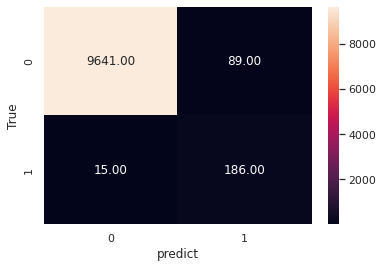

In [ ]:
from seaborn.matrix import heatmap
cml = confusion_matrix(test_Predict, Y_test)
axl = heatmap(cml, annot = True, fmt = '.2f')
axl.set(xlabel = 'predict', ylabel = True)
plt.show()

In [ ]:
input_data = (5000, 54, 5, 39, 15, 9, 40, 1, 2013, 0)

input_data = np.array(input_data)

input_data = input_data.reshape(1,-1)

input_data = Classifier.predict(input_data)

if input_data == 0:
  print('They are still active')
else:
  print("They are't active")

They are still active


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
input_data = (5000, 54, 5, 39, 15, 9, 40, 1, 2013, 0)

input_data = np.array(input_data)

input_data = input_data.reshape(1,-1)

input_data


array([[5000,   54,    5,   39,   15,    9,   40,    1, 2013,    0]])